<a href="https://colab.research.google.com/github/MasiboBrian/AirBNB-Price-Prediction/blob/master/Short_Text_classification_(BiLSTM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## BiLSM




In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, Conv1D, GlobalMaxPooling1D, Bidirectional, LSTM
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
import re
from nltk.corpus import stopwords
from nltk import word_tokenize
import nltk
nltk.download('stopwords')
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#df1 = pd.read_csv('/content/labeled_data.csv')
df1 = pd.read_csv('/content/Train.csv')

In [ ]:
df1.head()

,id,label,sublabel,country,text
0,833,Terrorism,Biowar,California,USA TODAY: .@FedEx will no longer to transport...
1,6932,attack,massacre,Houston,Another White mass murderer. Thank God I live ...
2,10505,Fire,wildfire,New Jersey,California is battling its scariest 2015 wildf...
3,5780,fire,forest fire,australia,U.S. Forest Service says spending more than ha...
4,4511,emergency,NaN,New Jersey,God forbid anyone in my family knows how to an...


In [ ]:
df1 = df1.dropna()
df1.head(10)

,id,label,sublabel,country,text
0,833,Terrorism,Biowar,California,USA TODAY: .@FedEx will no longer to transport...
1,6932,attack,massacre,Houston,Another White mass murderer. Thank God I live ...
2,10505,Fire,wildfire,New Jersey,California is battling its scariest 2015 wildf...
3,5780,fire,forest fire,australia,U.S. Forest Service says spending more than ha...
5,6573,Hospital,injury,australia,@JJ_DIRTY @MLSTransfers @greggmair oh Gio was ...
6,213,accident,airplane accident,Nigeria,I almost sent my coworker nudes on accident th...
7,8061,Police,rescue,Japan,Don't Panik! #KelbyTomlinson to the rescue! ht...
8,2770,Pandemic,curfew,Japan,Her curfew will start right after her private ...
9,8180,Police,rescue,England,VIDEO: 'We're picking up bodies from water': R...
10,10364,Terrorism,weapons,Japan,Your Router is One of the Latest DDoS Attack W...


In [ ]:
text = df1
text['label'] = text['label'].replace(['police'],'Police')
text['label'] = text['label'].replace(['attack'],'Attack')
text['label'] = text['label'].replace(['fire'],'Fire')

text.label.unique()

array(['Terrorism', 'Attack', 'Fire', 'Hospital', 'accident', 'Police',
       'Pandemic', 'emergency'], dtype=object)

In [ ]:
text.sublabel.unique()

array(['Biowar', 'massacre', 'wildfire', 'forest fire', 'injury',
       'airplane accident', 'rescue', 'curfew', 'weapons', 'riot',
       'smoke', 'collapse', 'Terrorist', 'army', 'scream', 'fire truck',
       'outbreak', 'chemical emergency', 'suicid bombing',
       'emergency plan', 'quarantine', 'military', 'wounds', 'ambulance'],
      dtype=object)

In [ ]:
df = text.reset_index(drop=True)
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string

        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing.
    text = text.replace('x', '')
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text
df['tweet'] = df['tweet'].apply(clean_text)

In [ ]:
df['tweet'] = df['tweet'].str.replace('\d+', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [ ]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each tweet.
MAX_SEQUENCE_LENGTH = 10
# This is fixed.
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['tweet'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 6886 unique tokens.


In [ ]:
X = tokenizer.texts_to_sequences(df['tweet'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)


Shape of data tensor: (1724, 10)


In [ ]:
Y = df.drop(['id','country','text','tweet'], axis = 1)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(Y)

pandas.core.frame.DataFrame

In [ ]:
Y = pd.get_dummies(data=Y, columns = Y.columns)
Y

,label_Attack,label_Fire,label_Hospital,label_Pandemic,label_Police,label_Terrorism,label_accident,label_emergency,sublabel_Biowar,sublabel_Terrorist,...,sublabel_outbreak,sublabel_quarantine,sublabel_rescue,sublabel_riot,sublabel_scream,sublabel_smoke,sublabel_suicid bombing,sublabel_weapons,sublabel_wildfire,sublabel_wounds
0,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1719,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1720,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1721,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1722,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
Y = Y.to_numpy()

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
'''
v = pd.get_dummies(df['label']).values
print('Shape of label tensor:', v.shape)
'''

"\nv = pd.get_dummies(df['label']).values\nprint('Shape of label tensor:', v.shape)\n"

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 99)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(1206, 10) (1206, 32)
(518, 10) (518, 32)


In [ ]:
X_train

array([[  65,  192,  203, ...,    2,    1, 3280],
       [2224, 2225, 2226, ..., 2229, 2230, 1305],
       [ 190,  332,  283, ...,    2,    1, 6327],
       ...,
       [5410, 5411, 5412, ...,  198,   19,   11],
       [ 118,  171,  152, ...,    2,    1, 5005],
       [ 228, 3846,  953, ...,    2,    1, 3847]], dtype=int32)

In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
Y_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]], dtype=uint8)

In [ ]:
type(Y_train)

numpy.ndarray

In [ ]:
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(1206, 10) (1206, 32)
(518, 10) (518, 32)


In [ ]:
from tensorflow.keras.optimizers import SGD

In [ ]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(Bidirectional(LSTM(20, return_sequences=True),
                        input_shape=(5, 10)))
model.add(Bidirectional(LSTM(10)))
model.add(Dense(32, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 10, 100)           5000000   
                                                                 
 bidirectional_4 (Bidirectio  (None, 10, 40)           19360     
 nal)                                                            
                                                                 
 bidirectional_5 (Bidirectio  (None, 20)               4080      
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 32)                672       
                                                                 
Total params: 5,024,112
Trainable params: 5,024,112
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
epochs = 100
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/100
16/16 [==============================] - 10s 155ms/step - loss: 6.8657 - accuracy: 0.1712 - val_loss: 6.7010 - val_accuracy: 0.1570
Epoch 2/100
16/16 [==============================] - 1s 41ms/step - loss: 6.6678 - accuracy: 0.1587 - val_loss: 6.5432 - val_accuracy: 0.1364
Epoch 3/100
16/16 [==============================] - 1s 43ms/step - loss: 6.6032 - accuracy: 0.1577 - val_loss: 6.5109 - val_accuracy: 0.1364
Epoch 4/100
16/16 [==============================] - 1s 41ms/step - loss: 6.5187 - accuracy: 0.1608 - val_loss: 6.4384 - val_accuracy: 0.1488
Epoch 5/100
16/16 [==============================] - 1s 41ms/step - loss: 6.3774 - accuracy: 0.2012 - val_loss: 6.3610 - val_accuracy: 0.1777
Epoch 6/100
16/16 [==============================] - 1s 41ms/step - loss: 6.2143 - accuracy: 0.2905 - val_loss: 6.2413 - val_accuracy: 0.2934
Epoch 7/100
16/16 [==============================] - 1s 40ms/step - loss: 6.0125 - accuracy: 0.4295 - val_loss: 6.1367 - val_accuracy: 0.3140
Epoc

In [ ]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

17/17 [==============================] - 0s 6ms/step - loss: 5.4380 - accuracy: 0.4749
Test set
  Loss: 5.438
  Accuracy: 0.475


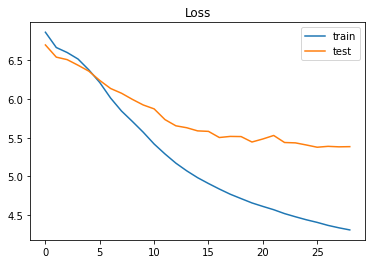

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();


KeyError: ignored

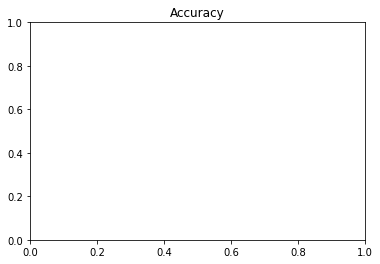

In [ ]:
plt.title('Accuracy')
plt.plot(history.history['accr'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show();

In [ ]:

new_tweet = ['As a woman you shouldnt complain about cleaning up your house. &amp']
seq = tokenizer.texts_to_sequences(new_tweet)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = ['Hate_speech', 'Offensive_language', 'None']
print(pred,labels[np.argmax(pred)])

